In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import pandas as pd
from datetime import datetime
import glob

index = {1:24, 2:25, 3:5, 4:6, 5:27, 6:23, 7:26, 8:7, 9:11, 10:13, 11:14, 12:15, 13:16, 14:17, 15:18, 16:19, 17:21, 18:22, 19:8, 20:9, 21:10, 22:1, 23:3, 24:2, 25:4, }

def getcsv(n):
    url="https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_provinceData.php?country=UKR&provinceID=" + str(index[n]) +"&year1=1981&year2=2019&type=Mean";
    vhi_url = urlopen(url)
    now = datetime.now()
    date_time = now.strftime("%m%d%Y-%H%M%S")
    fileout='vhi_id_' +str(n)+'_' + date_time + '.csv';
    out = open(fileout,'wb') 
    out.write(vhi_url.read())
    out.close()
    df=pd.read_csv(fileout,  skiprows=1, skipfooter=1, engine='python', names=['year', 'SMT', 'VCI', 'TCI', 'VHI'])
    df[['year', 'week', 'SMN']] = pd.DataFrame([ x.split() for x in df['year'].tolist() ])
    df['provinceID']=n
    df = df[['year', 'week', 'provinceID', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI']]
    df.to_csv(fileout)


def todf(path):
    filenames = glob.glob(path+"vhi_id_*.csv")
    dfl = [pd.read_csv(f) for f in filenames]
    data = pd.concat(dfl, ignore_index=True)
    data.drop(data.columns[[0]], axis=1,inplace=True)
    print(data)
    now = datetime.now()
    date_time = now.strftime("%m%d%Y-%H%M%S")
    fileout='all_in_one_'+ date_time+'.csv';
    data.to_csv(fileout)
    return data

def vhi(prid, year, path):
    filename = glob.glob(path+"vhi_id_"+str(prid)+ "*.csv")
    df=pd.read_csv(filename[0])
    data = df[df['year'] == year]
    print(data)
    print(data['VHI'].min())
    print(data['VHI'].max())


def dry(prid, path):
    filename = glob.glob(path+"vhi_id_"+str(prid)+ "*.csv")
    df=pd.read_csv(filename[0])
    data = df[df['VHI'] < 15]
    print(data.set_index('VHI')['year'])


def middledry(prid, path):
    filename = glob.glob(path+"vhi_id_"+str(prid)+ "*.csv")
    df=pd.read_csv(filename[0])
    data = df[df['VHI'] < 35]
    print(data.set_index('VHI')['year'])

In [4]:
for i in range(1,26):
    getcsv(i)
    
df = todf(r'C:\Users\k_zah\Documents\python\\')
print ("Done.");

       year  week  provinceID    SMN     SMT    VCI    TCI    VHI
0      1982     1          10  0.045  261.12  36.68  41.79  39.23
1      1982     2          10  0.041  262.61  36.46  35.10  35.78
2      1982     3          10  0.041  263.82  36.49  30.79  33.64
3      1982     4          10  0.038  264.71  33.46  28.66  31.06
4      1982     5          10  0.034  264.76  29.66  30.50  30.08
...     ...   ...         ...    ...     ...    ...    ...    ...
96245  2019    48           9  0.107  272.77  55.83  13.44  34.62
96246  2019    49           9  0.102  271.60  56.68  15.02  35.83
96247  2019    50           9  0.097  270.25  58.73  15.81  37.27
96248  2019    51           9  0.092  268.83  59.15  15.19  37.16
96249  2019    52           9  0.089  268.32  61.07  13.85  37.46

[96250 rows x 8 columns]
Done.


In [3]:
vhi(8, 2005, r'C:\Users\k_zah\Documents\python\\')

      Unnamed: 0  year  week  provinceID    SMN     SMT    VCI    TCI    VHI
1145        1145  2005     1           8  0.127  265.02  65.77  39.34  52.56
1146        1146  2005     2           8  0.116  263.79  61.05  45.59  53.32
1147        1147  2005     3           8  0.107  261.96  55.83  54.96  55.39
1148        1148  2005     4           8  0.098  260.18  47.30  65.11  56.20
1149        1149  2005     5           8  0.090  258.47  37.65  74.61  56.13
1150        1150  2005     6           8  0.085  257.20  30.64  82.35  56.50
1151        1151  2005     7           8  0.083  256.89  26.91  85.76  56.33
1152        1152  2005     8           8  0.088  257.96  27.41  86.40  56.90
1153        1153  2005     9           8  0.094  259.60  28.12  87.64  57.88
1154        1154  2005    10           8  0.106  262.21  30.34  86.17  58.26
1155        1155  2005    11           8  0.129  266.77  36.93  80.07  58.50
1156        1156  2005    12           8  0.164  272.48  46.98  70.59  58.78

In [27]:
middledry(12, r'C:\Users\k_zah\Documents\python\\')

VHI
32.92    1982
29.63    1982
27.10    1982
25.19    1982
23.09    1982
         ... 
34.82    2015
32.39    2019
32.73    2019
33.80    2019
34.38    2019
Name: year, Length: 173, dtype: int64


In [18]:
dry(11, r'C:\Users\k_zah\Documents\python\\')

     year
230  1986
609  1993


week
1     48.51
2     47.53
3     45.67
4     44.49
5     42.99
6     43.64
7     44.33
8     44.63
9     45.46
10    47.30
11    47.68
12    51.21
13    51.85
14    51.35
15    52.44
16    53.08
17    52.35
18    49.59
19    46.93
20    45.45
21    44.01
22    42.58
23    41.91
24    41.50
25    42.90
26    43.45
27    43.21
28    47.12
29    52.61
30    57.29
31    59.51
32    61.06
33    62.60
34    62.76
35    62.20
36    62.78
37    62.57
38    61.31
39    59.43
40    55.69
41    54.54
42    55.68
43    56.18
44    55.21
45    53.66
46    51.81
47    52.75
48    53.15
49    50.28
50    46.40
51    42.71
52    39.81
Name: VHI, dtype: float64

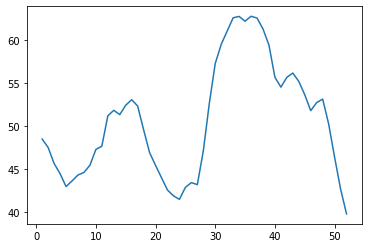

In [33]:
f=df[(df.year == 2007) & (df.provinceID == 5)].set_index('week')['VHI']
sns.lineplot(data=f);
f

In [94]:
dfn = pd.DataFrame(columns = ['year', 'max_vhi', 'min_vhi'])
dfn.astype({'year':'int32'}).dtypes
years = df.year.unique()
for year in years:
    str1 = {'year': int(year//1), 'max_vhi': (df[df.year==year]).VHI.max(), 'min_vhi' : (df[df.year==year]).VHI.min()}
    dfn = dfn.append(str1, ignore_index = True)
dfn.year = dfn.year.astype('int32')

In [95]:
dfn


,year,max_vhi,min_vhi
0,1982,84.29,19.92
1,1983,73.25,23.05
2,1984,86.60,12.64
3,1985,75.63,18.00
4,1986,63.39,12.45
5,1987,76.10,20.90
6,1988,79.36,22.58
7,1989,68.86,18.04
8,1990,76.19,18.62
9,1991,73.29,24.40


In [98]:
df.groupby('week').VHI.agg(['max', 'min'])

,max,min
week,,
1,78.97,17.64
2,74.87,20.61
3,76.84,20.54
4,75.70,21.24
5,75.60,21.77
6,70.32,22.81
7,63.87,25.33
8,63.71,24.67
9,62.97,23.10


In [126]:
df1 = pd.DataFrame(columns = ['year', 'max_vhi', 'min_vhi'])
years = df.year.unique()
for year in years:
    str1 = {'year' : year, 'max_vhi' : [(df[(df.VHI == df[(df.year == year)].VHI.max())].week).drop_duplicates()], 'min_vhi' : [(df[(df.VHI == df[(df.year == year)].VHI.min())].week).drop_duplicates()]}
    df1 = df1.append(str1, ignore_index=True)

In [127]:
df1

,year,max_vhi,min_vhi
0,1982,"[[31, 37, 33]]","[[26, 45, 29]]"
1,1983,"[[23, 33]]","[[51, 49]]"
2,1984,"[[28, 39]]",[[48]]
3,1985,"[[25, 27]]",[[51]]
4,1986,"[[38, 30, 19, 2, 35, 39, 27, 36]]",[[35]]
5,1987,"[[24, 32, 29]]","[[51, 42]]"
6,1988,[[32]],"[[36, 17, 1, 48]]"
7,1989,"[[21, 22, 20]]",[[33]]
8,1990,"[[26, 21]]","[[51, 50]]"
9,1991,[[28]],"[[52, 3, 49]]"


In [139]:
dates = df.year.astype('str') + '-' + df.week.astype('str') + '-1'
df['month'] = pd.to_datetime(dates, format = '%Y-%W-%w')
df['month'] = pd.DatetimeIndex(df['month']).month

In [140]:
df


,year,week,provinceID,SMN,SMT,VCI,TCI,VHI,month
0,1982,1,10,0.045,261.12,36.68,41.79,39.23,1
1,1982,2,10,0.041,262.61,36.46,35.10,35.78,1
2,1982,3,10,0.041,263.82,36.49,30.79,33.64,1
3,1982,4,10,0.038,264.71,33.46,28.66,31.06,1
4,1982,5,10,0.034,264.76,29.66,30.50,30.08,2
...,...,...,...,...,...,...,...,...,...
96245,2019,48,9,0.107,272.77,55.83,13.44,34.62,12
96246,2019,49,9,0.102,271.60,56.68,15.02,35.83,12
96247,2019,50,9,0.097,270.25,58.73,15.81,37.27,12
96248,2019,51,9,0.092,268.83,59.15,15.19,37.16,12


In [142]:
df.groupby('month').VHI.mean()

month
1     44.399495
2     43.385970
3     42.595602
4     44.506822
5     52.334957
6     53.975290
7     53.325438
8     51.523855
9     48.150362
10    45.488471
11    41.177777
12    41.722274
Name: VHI, dtype: float64